In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
X,Yp = make_blobs?

In [9]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=11)
print(X.shape,Y.shape)

(500, 2) (500,)


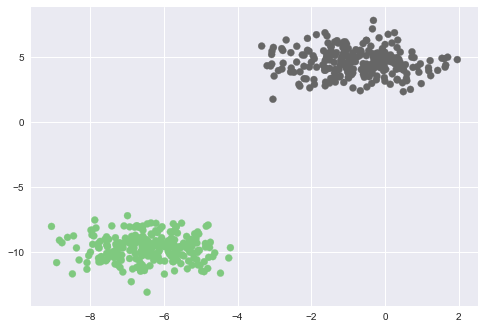

In [12]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# This is linearly seperable data. Now lets define function for our perceptron

In [13]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [15]:
# We can use sigmoid function on a numpy array as well , this functionality is called as broadcasting which is used by numpy.
z=np.array([1,2,3,4,5,6])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.99752738])

# For implimentation of perceptron we need to 
- Learn the weights
- Reduce the loss
- Make the prediction

In [17]:
def predict(X,weights):
    """X-m*n martix and weights are n*1 matrix and their dot product will give us m*1 vector """
    z=np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions


In [18]:
def loss(X,Y,weights):
    """Loss is the binary cross entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost


In [21]:
def update(X,Y,weights,learning_rate):
    """Perform weight update for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y) #n*1 matrix is obtained as every element of x is going to be multiplied by y_-y 
    m = X.shape[0]
    
    weights = weights - learning_rate*dw/(float(m))
    return weights


def train(X,Y,learning_rate=0.5,maxEpoch=100):
    # Modify the input to make the bias term x0
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Initialize Weights
    weights = np.zeros(X.shape[1])
    
    # Iterate over all epochs to update
    for epoch in range(maxEpoch):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10 ==0 :
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights


In [23]:
weights = train(X,Y)

Epoch 0 Loss 0.0018
Epoch 10 Loss 0.0016
Epoch 20 Loss 0.0015
Epoch 30 Loss 0.0014
Epoch 40 Loss 0.0013
Epoch 50 Loss 0.0012
Epoch 60 Loss 0.0011
Epoch 70 Loss 0.0010
Epoch 80 Loss 0.0010
Epoch 90 Loss 0.0009


# It is going to have n+1 features as w0

In [42]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1 # wherever the probability is greater than 0.5 we are going to make it 1
        return labels

In [43]:
a=np.zeros((5,5))
print(a)
a[2,3] = 10
print(a)
a[a>0] = 20
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


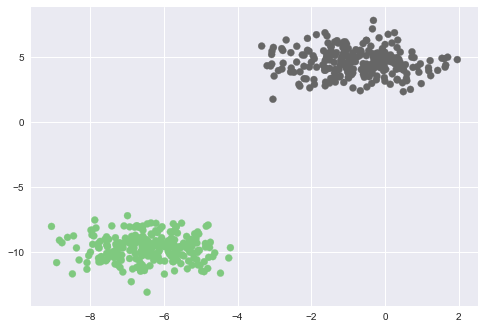

In [44]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

In [45]:
x1 = np.linspace(-8,2,10)
 
x2 = -(weights[0]+weights[1]*x1)/weights[2]

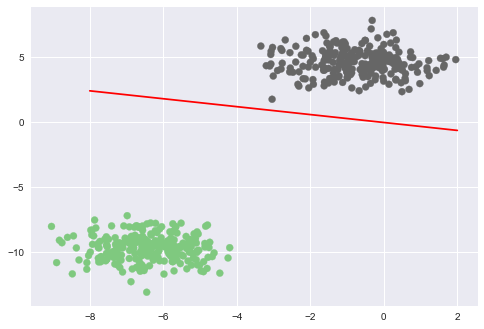

In [46]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [47]:
# Find the accuracy
Y_ = getPredictions(X,weights,labels=True)
print(Y_)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [48]:
Y_ = getPredictions(X,weights,labels=True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

1.0


# lets change the data for make_moons

In [49]:
from sklearn.datasets import make_moons

(100, 2) (100,)


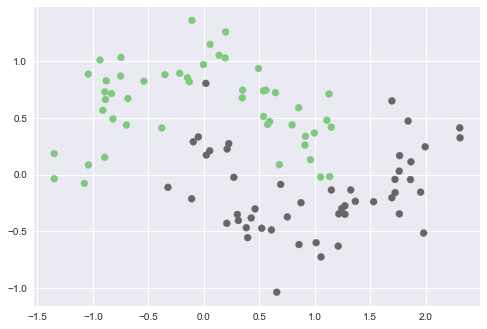

In [52]:
X,Y = make_moons(n_samples=100,shuffle=True,noise=0.2,random_state=1)
print(X.shape,Y.shape)
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [53]:
weights = train(X,Y)

Epoch 0 Loss 0.6464
Epoch 10 Loss 0.4538
Epoch 20 Loss 0.3967
Epoch 30 Loss 0.3687
Epoch 40 Loss 0.3515
Epoch 50 Loss 0.3396
Epoch 60 Loss 0.3308
Epoch 70 Loss 0.3240
Epoch 80 Loss 0.3186
Epoch 90 Loss 0.3142


In [54]:
x1 = np.linspace(-8,2,10)
 
x2 = -(weights[0]+weights[1]*x1)/weights[2]

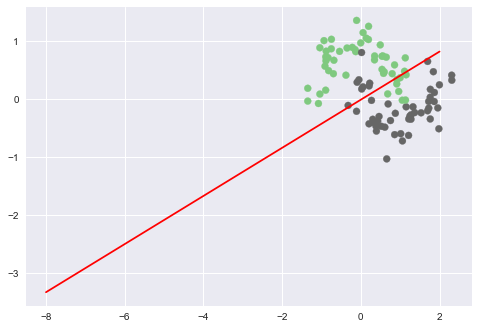

In [55]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [56]:
Y_ = getPredictions(X,weights,labels=True)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

0.84


# Perceptron learns on a linear dataset when given a non linear dataset it does not learn efficiently. A non linearly seperable model is learnt using Multilayer Perceptron(MLP)